In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../data/raw/star_classification.csv')

<Axes: xlabel='class', ylabel='count'>

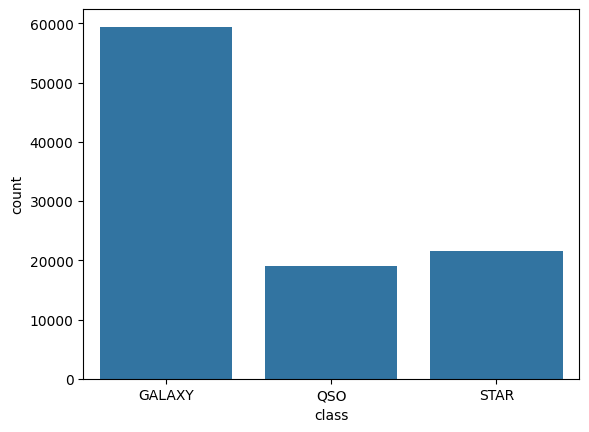

In [2]:
#repartition of the classes
sns.countplot(x='class', data=df)

In [3]:
#drop the columns that are not relevant for the classification
df=df.drop(['obj_ID','run_ID','rerun_ID','cam_col','field_ID','spec_obj_ID','plate','MJD','fiber_ID'], axis=1)

<Axes: >

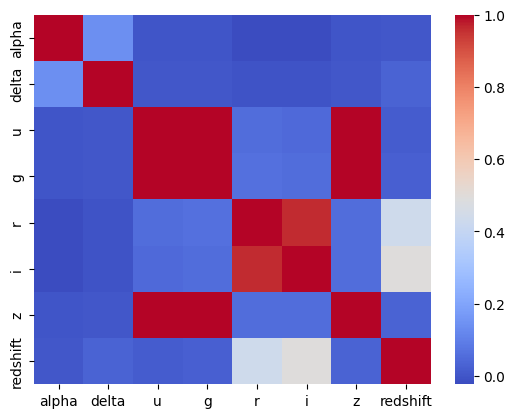

In [4]:
#correlation matrix
df_w = df.drop(['class'], axis=1)
corr = df_w.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')

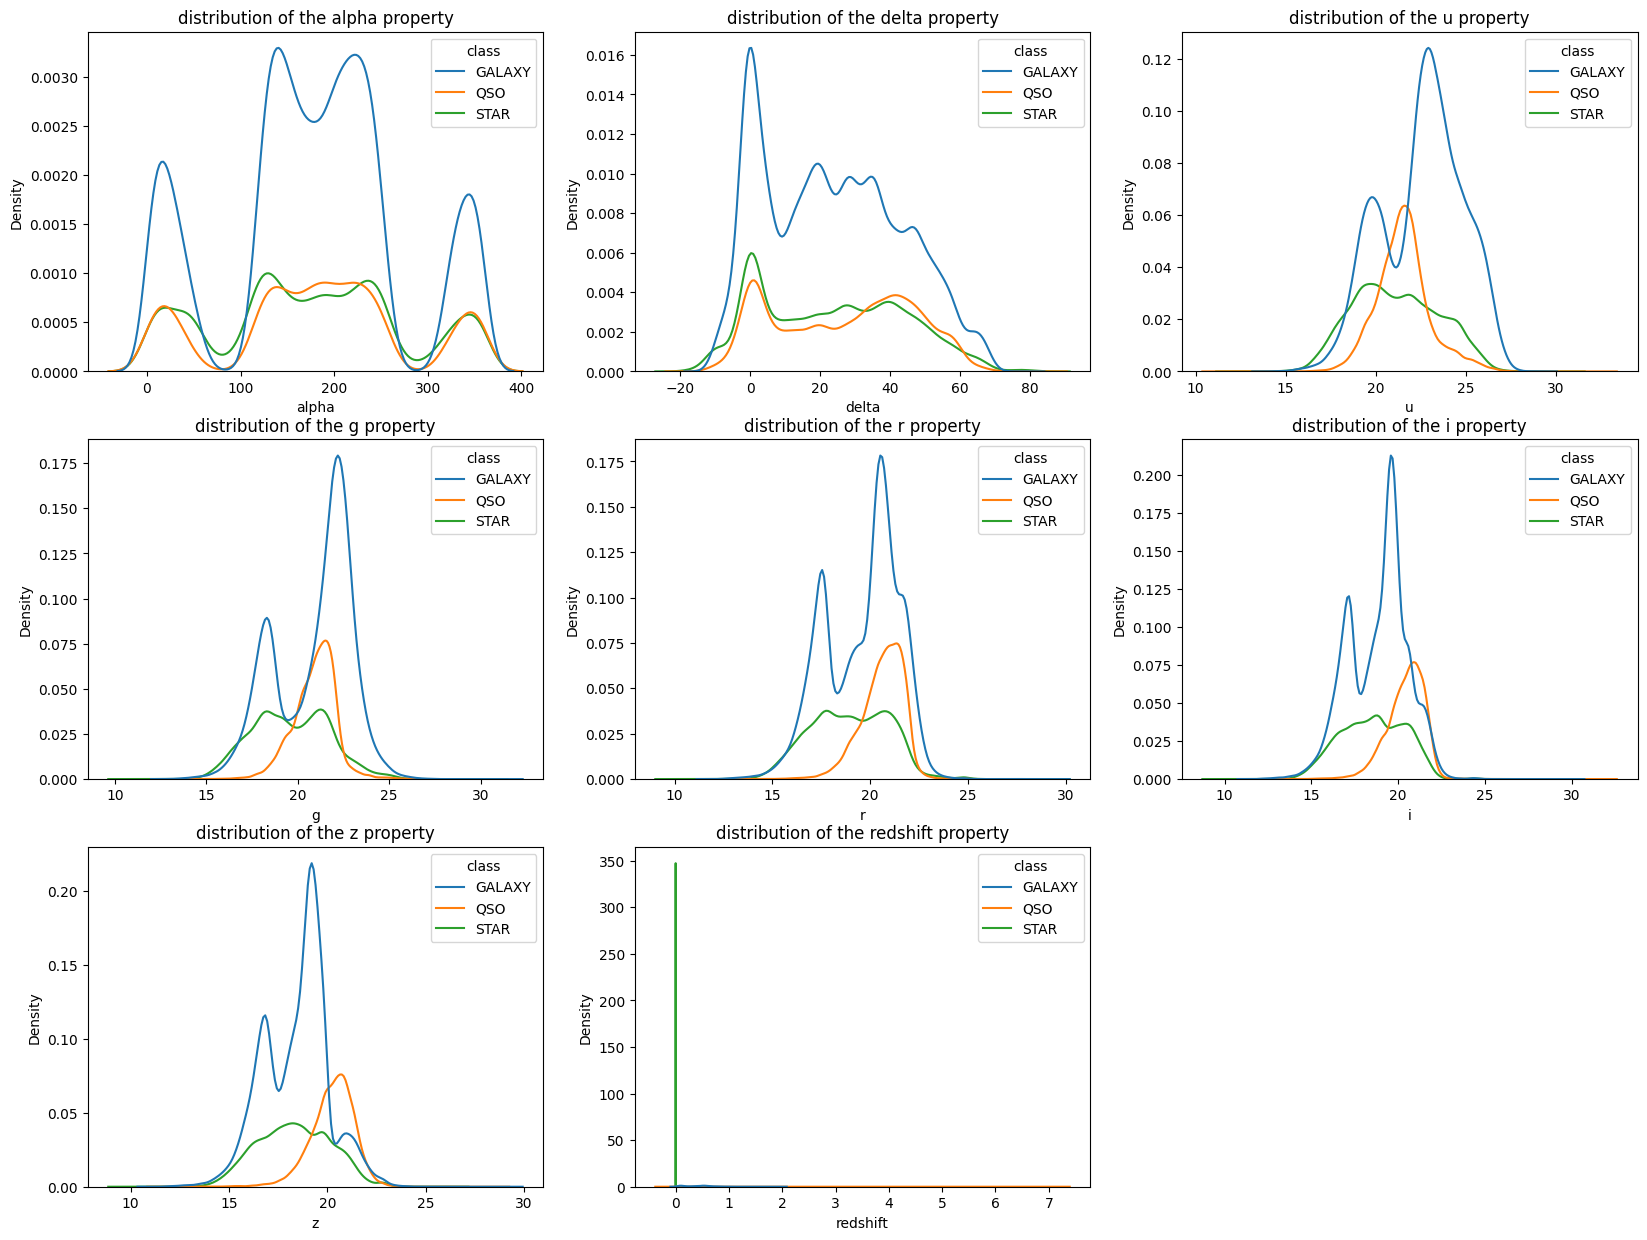

In [17]:
#data distribution
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()
for i,var in enumerate(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']):
    sns.kdeplot(data=df, x=var, hue='class', ax=axes[i])
    axes[i].set_title("distribution of the "+ var+" property")
axes[-1].set_visible(False)

For g and z we can see some abnormal values, but we can't realy see well the distribution of the data. Let's try to plot the data in log scale.

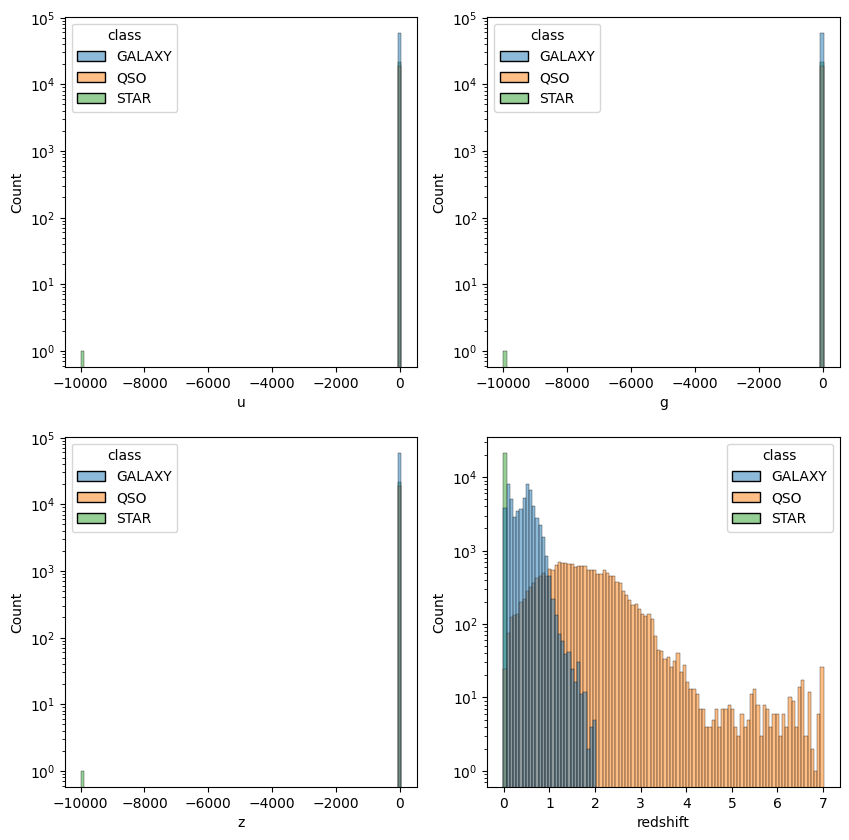

In [2]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

sns.histplot(data=df, x='u', hue='class', bins=100, ax=axes[0])
axes[0].set_yscale('log')
sns.histplot(data=df, x='g', hue='class', bins=100, ax=axes[1])
axes[1].set_yscale('log')
sns.histplot(data=df, x='z', hue='class', bins=100, ax=axes[2])
axes[2].set_yscale('log')
sns.histplot(data=df, x='redshift', hue='class', bins=100, ax=axes[3])
axes[3].set_yscale('log')


Almost every value in g and z are close to 0, exept for 1 point near -100000. Let's remove it. 

In [3]:
df = df[df['g'] > -2000]
df = df[df['z'] > -2000]
df = df[df['u'] < -2000]

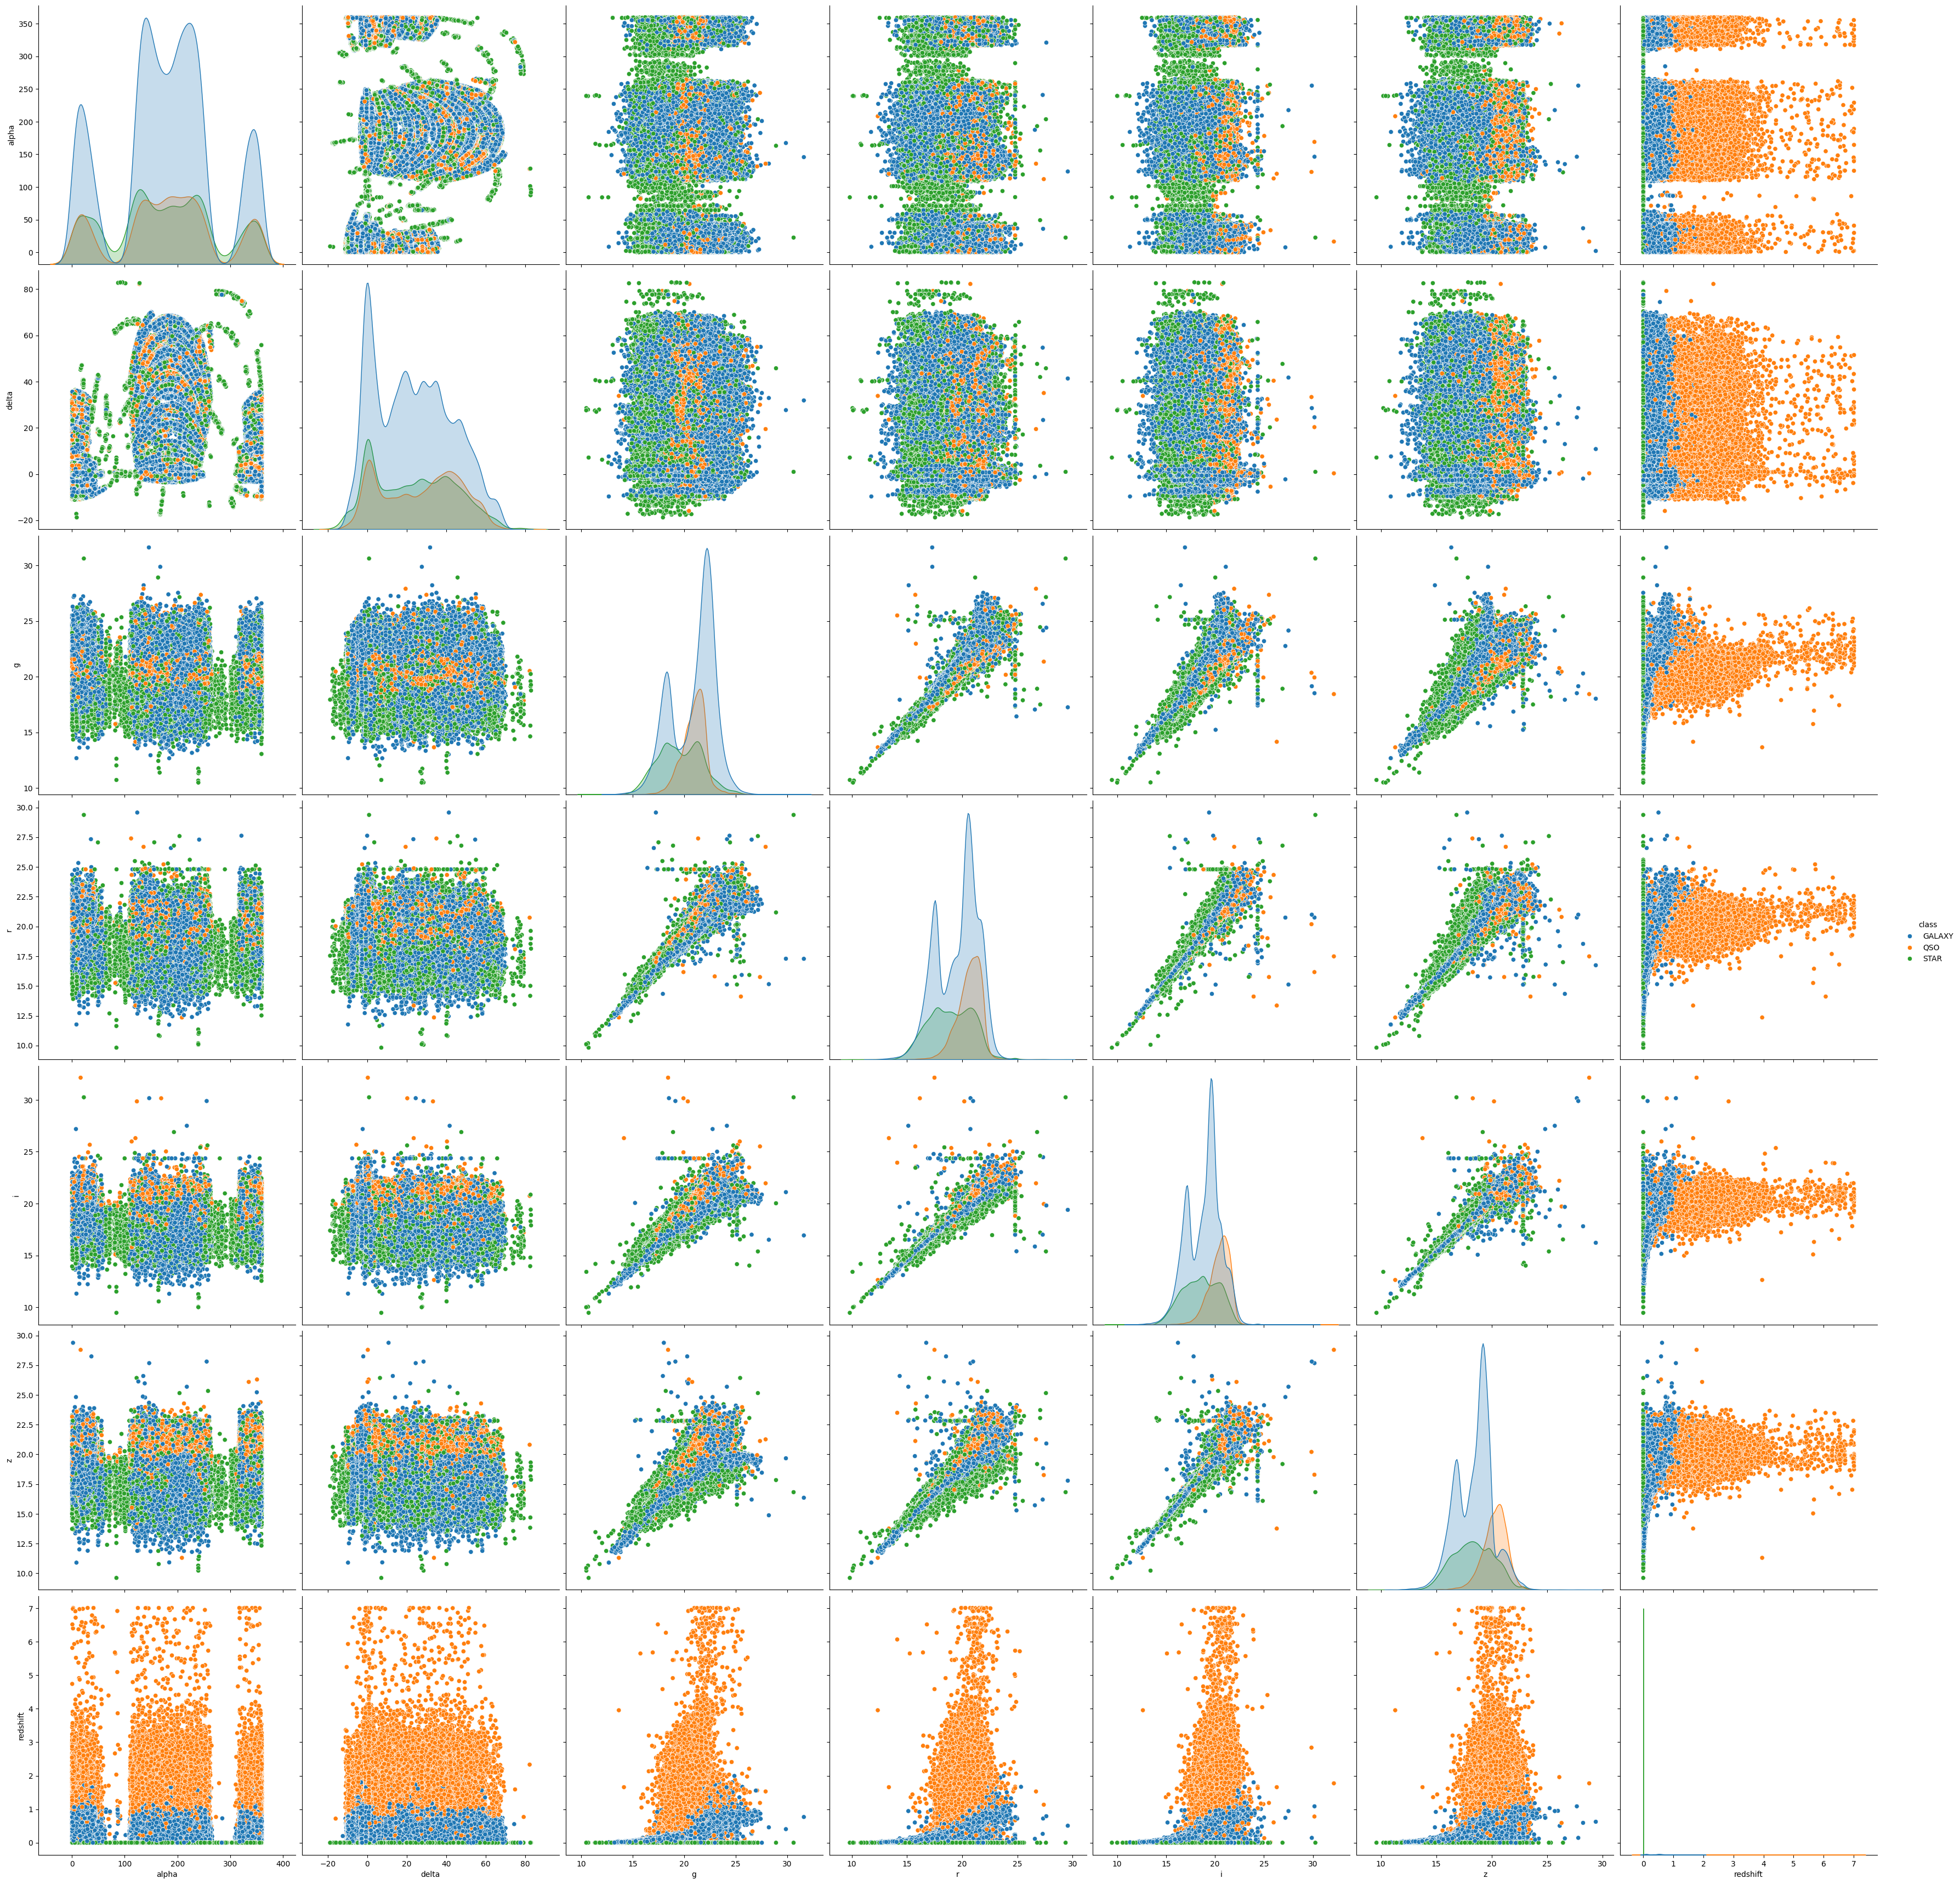

In [16]:
#show for each class the distribution of the features
sns.pairplot(df, hue='class', vars=['alpha','delta','g','r','i','z','redshift'], height=5)
